In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
import random
warnings.filterwarnings("ignore")

# FFT (warm up)

## (a)
Using `'scipy.fft'`, calculate and the fourier modes of $x(t) = 2\sin(t) + \sin(10t)$. Plot the absolute values.

In [ ]:
from scipy.fft import fft, fftshift, fftfreq

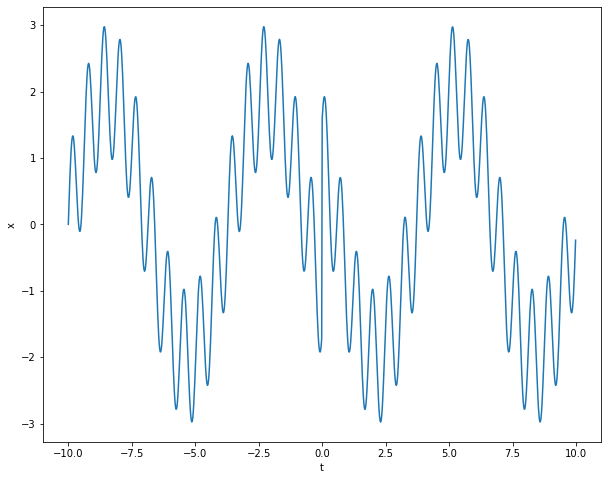

In [ ]:
n = 1000
ti = 0    #s
tf = 20   #s
%matplotlib inline
plt.figure(figsize = (10,8))
time = np.fft.fftfreq(n,1/(tf-ti))
time = np.fft.fftshift(time)
x = 2 * np.sin(time) + np.sin(10 * time)
fourier = np.fft.fftshift(x)
plt.xlabel('t')
plt.ylabel('x')
plt.plot(time,fourier)

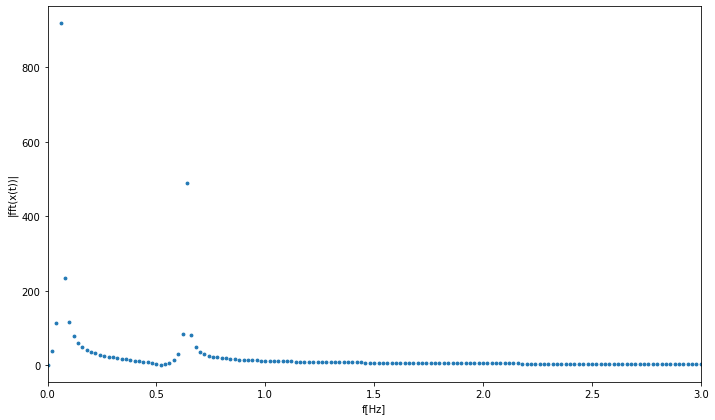

In [ ]:
%matplotlib inline

plt.figure(figsize=(10,6))
freq = np.fft.fftfreq(n,1/(tf-ti))
x1 = 2 * np.sin(freq) + np.sin(10 * freq)
f =np.fft.fft(x1)
f1 = np.absolute(f)
plt.xlim(0,3)
plt.xlabel('f[Hz]')
plt.ylabel('|fft(x(t))|')
plt.tight_layout()
plt.scatter(freq,f1,s=8)
plt.show()

What's the prominent frequency? Does it make sense? If not, what's wrong with the code?

it seems that the prominent frequency is about 0.05 because the fft has the maximum value at this point.

## (b)

Calculate and plot Fourier transform of sawtooth function.

In [ ]:
from scipy.signal import sawtooth

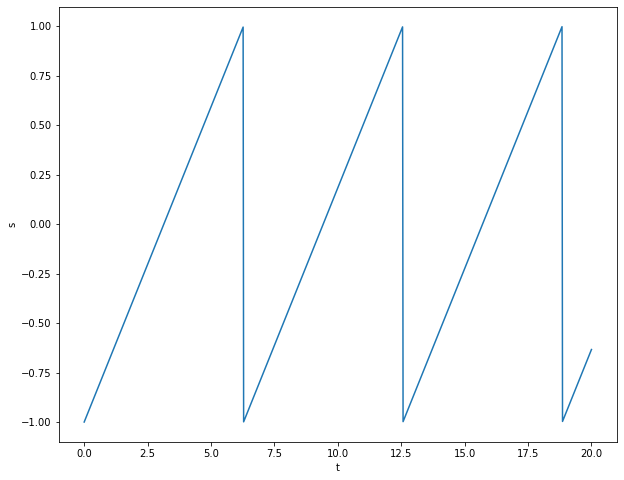

In [ ]:
plt.figure(figsize=(10,8))
t = np.linspace(ti,tf,n)
plt.xlabel('t')
plt.ylabel('s')
plt.plot(t, sawtooth(t))

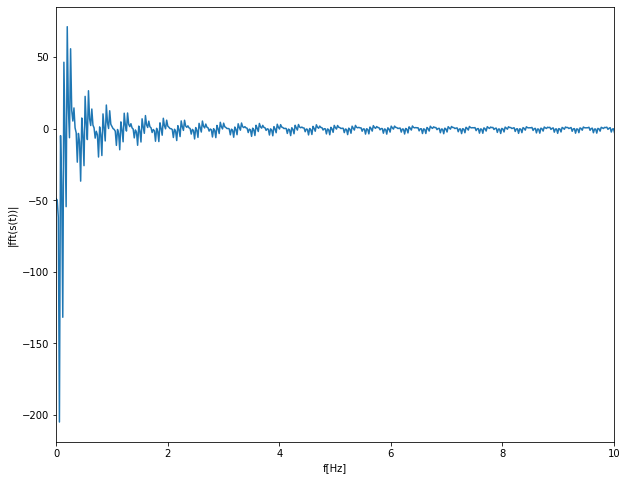

In [ ]:
plt.figure(figsize= (10,8))
fft_s = np.fft.fft(sawtooth(t))
plt.xlim(0,10)
plt.xlabel('f[Hz]')
plt.ylabel('|fft(s(t))|')
plt.plot(t,fft_s)

# Sunspot data

The attached file `Sunspots.csv` contains monthly solar activity data over a 272 year period. First read the data in a pandas Dataframe and tell pandas to interpret the second column as `datetime`.

In [ ]:
url = 'https://raw.githubusercontent.com/SBUDataAnalysis/hw8-saraghl/main/Sunspots.csv'
sunspot = pd.read_csv(url)
sunspot

,Num,Date,Monthly
0,0,1749-01-31,96.7
1,1,1749-02-28,104.3
2,2,1749-03-31,116.7
3,3,1749-04-30,92.8
4,4,1749-05-31,141.7
...,...,...,...
3260,3260,2020-09-30,0.6
3261,3261,2020-10-31,14.4
3262,3262,2020-11-30,34.0
3263,3263,2020-12-31,21.8


In [ ]:
clean_data = pd.read_csv(url,index_col=0,names=['Date','number of Sunspots'],header=0)
clean_data['Date'] = pd.to_datetime(clean_data['Date'])
clean_data

,Date,number of Sunspots
0,1749-01-31,96.7
1,1749-02-28,104.3
2,1749-03-31,116.7
3,1749-04-30,92.8
4,1749-05-31,141.7
...,...,...
3260,2020-09-30,0.6
3261,2020-10-31,14.4
3262,2020-11-30,34.0
3263,2020-12-31,21.8


In [ ]:
df_plot= clean_data.set_index('Date')

Text(0, 0.5, 'intensity')

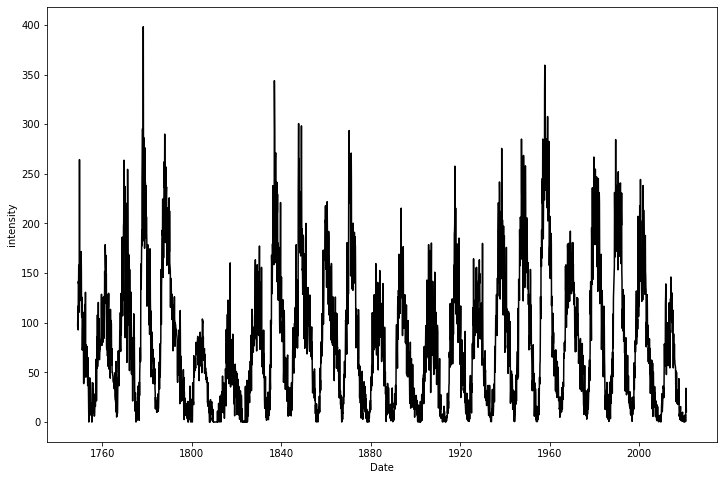

In [ ]:
plt.figure(figsize =(12,8))
plt.plot(df_plot['number of Sunspots'], color = 'black')
plt.xlabel('Date')
plt.ylabel('intensity')

## (a)

Do an appropriate Fourier analysis to determine the main cylce of solar activity. What's the period?

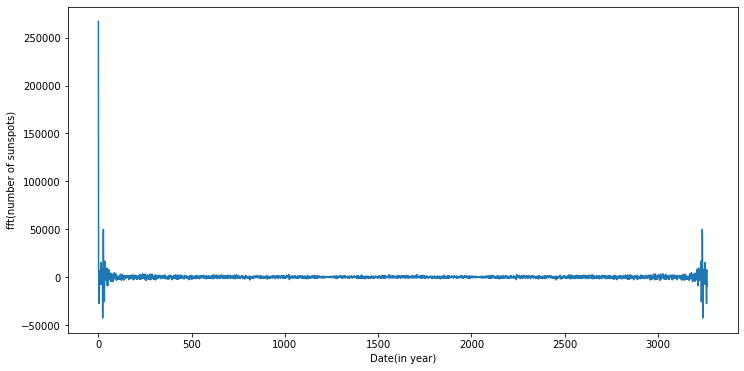

In [ ]:
fft_sunspot = np.fft.fft(clean_data['number of Sunspots'])
%matplotlib inline
plt.figure(figsize=(12,6))
plt.xlabel('Date(in year)')
plt.ylabel('fft(number of sunspots)')
plt.plot(fft_sunspot)

In [ ]:
from scipy.signal import argrelextrema

In [ ]:
#determining the solar cycle
lags = np.arange(12*15)
autocorrelation = np.array([clean_data['number of Sunspots'].autocorr(lag=n) for n in lags])
argrelextrema(autocorrelation, np.greater, order = 1)[0]

array([125, 128])

128 is greater than 125 so the solar cycle is 128 months.

## (b)
First do an inverse Fourier analysis to confirm that you get back the same data.

In [ ]:
from scipy.fft import ifft

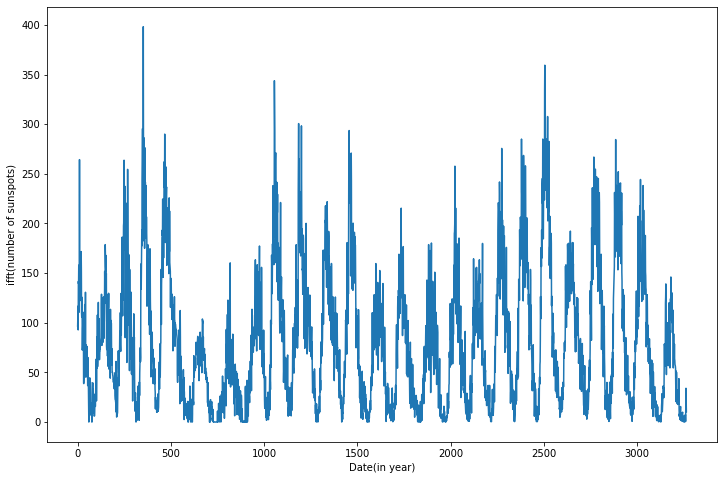

In [ ]:
ifft_sunspot = np.fft.ifft(fft_sunspot)
%matplotlib inline
plt.figure(figsize=(12,8))
plt.xlabel('Date(in year)')
plt.ylabel('ifft(number of sunspots)')
plt.plot(ifft_sunspot)

## (c)

Remover the first ten biggest values of Fourier transformed series, do an inverse transform once more and plot the results.

Why does the plot look different? And what's the difference?

In [ ]:
fft_sort = sorted(fft_sunspot)
fft_new = fft_sort[:-10]

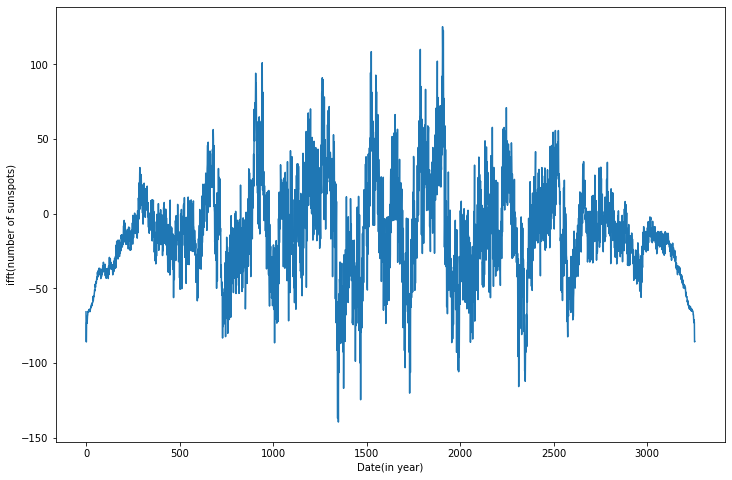

In [ ]:
ifft_new = np.fft.ifft(fft_new)
%matplotlib inline
plt.figure(figsize=(12,8))
plt.xlabel('Date(in year)')
plt.ylabel('ifft(number of sunspots)')
plt.plot(ifft_new)

due to the fact that we have eliminated the higher frequencies, both sides of the ifft diagram are bent downwards, which seems natural because the larger frequencies play more important role in the shape of the ifft diagram so they've changed the shape of the graph.

# Q4: Correlation function and power spectrum

Remember from last homework that we calculated autocorrelation function for a data that we made?

Load the data saved as `2pcf.txt`, calculate the correlation function once more and then plot the power spectrum using that data.

In [ ]:
url2 = 'https://raw.githubusercontent.com/SBUDataAnalysis/hw8-saraghl/main/2pcf.txt'
data = pd.read_csv(url2)

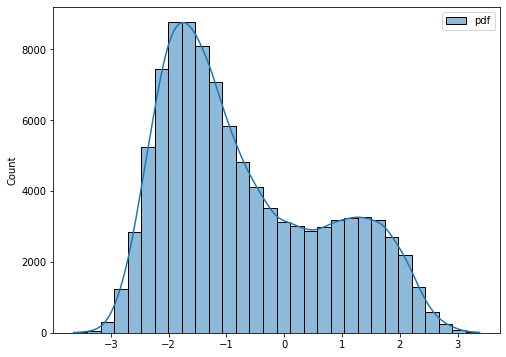

In [ ]:
plt.figure(figsize=(8,6))
sns.histplot(data,kde = True,bins=30,label ='pdf')
plt.legend()
plt.show()

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf

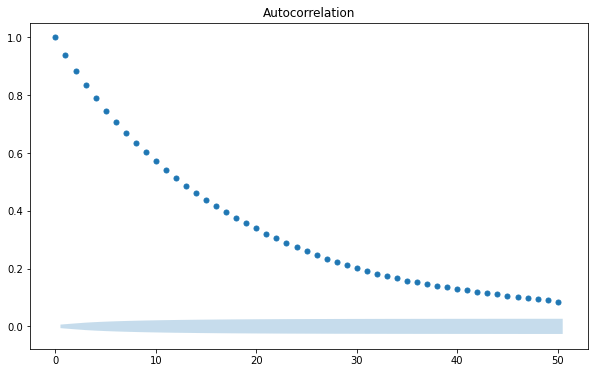

In [ ]:
fig = plot_acf(data,ax = plt.subplot(1,1,1),use_vlines = False)
fig.set_size_inches(10,6)
fig
plt.show()

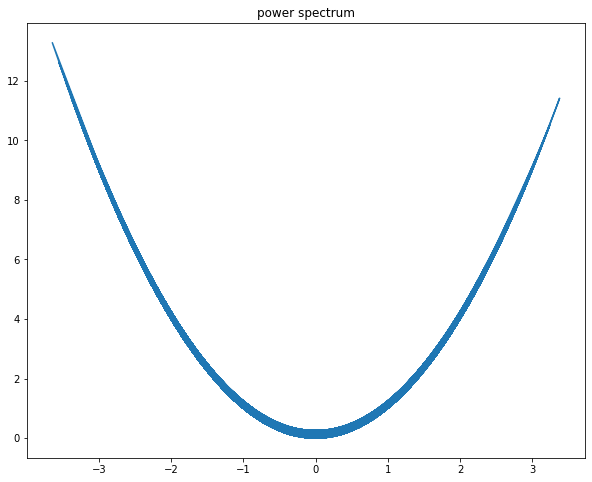

In [ ]:

plt.figure(figsize = (10,8))
fourier_transform = np.fft.fft(data)
abs_vals = np.abs(fourier_transform)
power_spectrum= (abs_vals ** 2)
plt.title('power spectrum')
plt.plot(data,power_spectrum)